In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('117fa20b-d087-487c-b19f-464b27a79ed5.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.drop(np.where(df["User_Score"] == 'tbd')[0])
df["User_Score"] = pd.to_numeric(df["User_Score"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 16718
Data columns (total 16 columns):
Name               14292 non-null object
Platform           14294 non-null object
Year_of_Release    14073 non-null float64
Genre              14292 non-null object
Publisher          14242 non-null object
NA_Sales           14294 non-null float64
EU_Sales           14294 non-null float64
JP_Sales           14294 non-null float64
Other_Sales        14294 non-null float64
Global_Sales       14294 non-null float64
Critic_Score       7055 non-null float64
Critic_Count       7055 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          7693 non-null object
Rating             7575 non-null object
dtypes: float64(10), object(6)
memory usage: 1.9+ MB


In [19]:
df.Critic_Count.mean()

28.689865343727853

In [20]:
df.User_Count.mean()

162.22990777338603

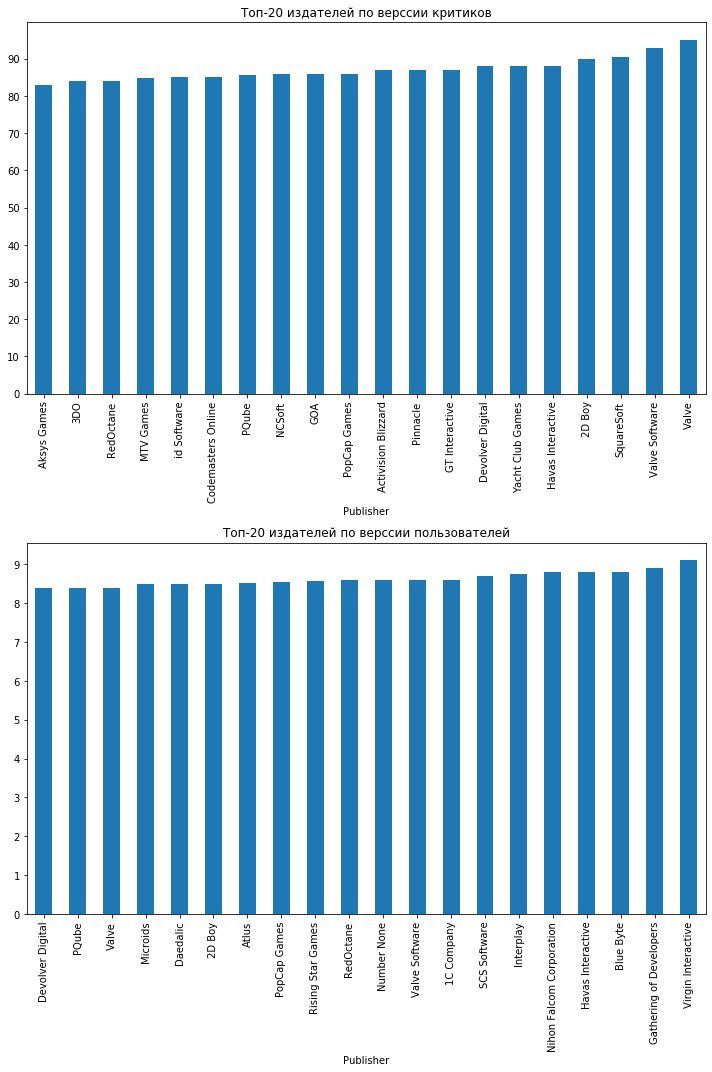

In [21]:
b = df[df['User_Count']>100].groupby('Publisher')
publisher_score_users = b.User_Score.mean().dropna().sort_values(axis=0)

a = df[df['Critic_Count']>20].groupby('Publisher')
publisher_score_critic = a.Critic_Score.mean().dropna().sort_values(axis=0)


fig, axes = plt.subplots(2,figsize=(10, 15))

publisher_score_critic[-20:].plot(kind = 'bar', ax=axes[0],
                                  yticks = np.arange(0, 100, step=10),
                                  title = 'Топ-20 издателей по верссии критиков')

publisher_score_users[-20:].plot(kind = 'bar', ax=axes[1],
                                 yticks = np.arange(0, 10, step=1),
                                 title = 'Топ-20 издателей по верссии пользователей')
fig.tight_layout()

plt.show()


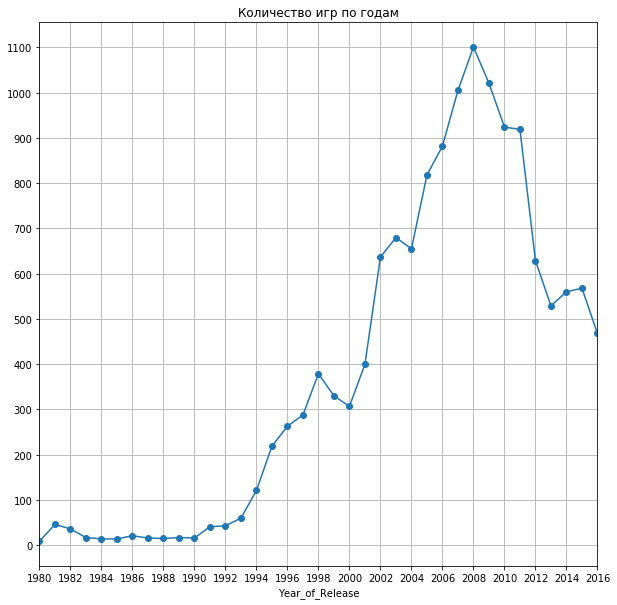

In [211]:
col_games = df[df['Year_of_Release'] != 2017].groupby('Year_of_Release')

col_games.Name.count().plot(grid = True, figsize = [10,10], marker='o',
                            xticks = np.arange(1980, 2017, step=2),
                            yticks = np.arange(0, 1200, step=100),
                            title = 'Количество игр по годам'
                           )
plt.show()

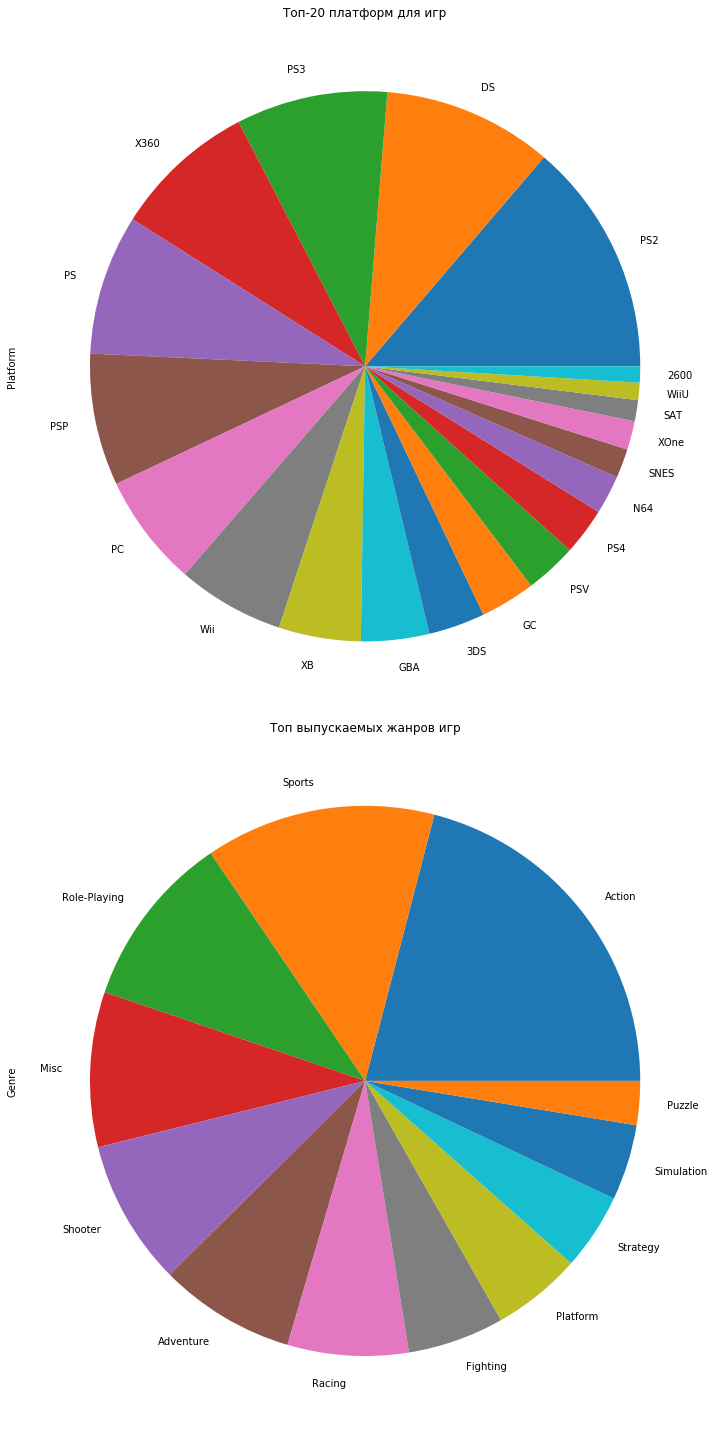

In [224]:
fig, axes = plt.subplots(2,figsize=(20, 20))

df.Platform.value_counts()[:20].plot(kind = 'pie', ax = axes[0],
                                     figsize = [20,20],
                                     title = 'Топ-20 платформ для игр'
                                    )

df.Genre.value_counts().plot(kind = 'pie',ax = axes[1], 
                                  figsize = [20,20],
                                  title = 'Топ выпускаемых жанров игр'
                                 )

fig.tight_layout()
plt.show()

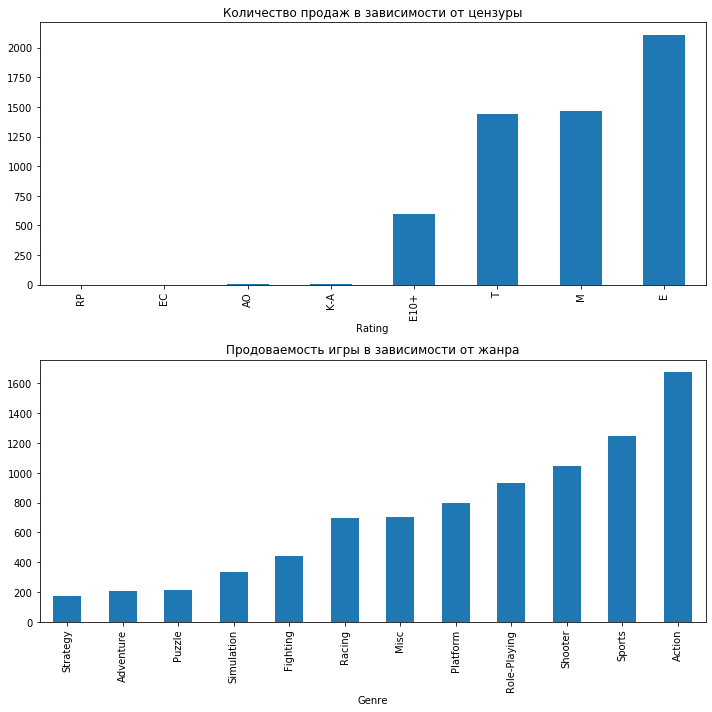

In [222]:
fig, axes = plt.subplots(2,figsize=(10, 15))

ESRB = df.groupby('Rating').sum()
ESRB.Global_Sales.sort_values(axis=0).plot(kind = 'bar', figsize = (10,10),
                                           ax = axes[0],
                                           title = 'Количество продаж в зависимости от цензуры'
                                          )
genre_sales = df.groupby('Genre').sum()
genre_sales.Global_Sales.sort_values(axis=0).plot(kind = 'bar', figsize = (10,10),
                                                  ax = axes[1],
                                                  title = 'Продоваемость игры в зависимости от жанра'
                                                 )
fig.tight_layout()

plt.show()